In [1]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [2]:
u_inf = 1.0 

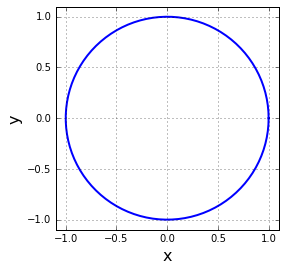

In [3]:
R = 1.0 
theta = numpy.linspace(0,math.pi*2, 100)
x_cylinder , y_cylinder = R*numpy.cos(theta) , R*numpy.sin(theta)

size = 4
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder, color='b', linestyle='-', linewidth=2)
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

In [4]:
class Panel:
        
    def __init__(self,xa,ya,xb,yb):
        
        self.xa , self.ya = xa , ya
        self.xb , self.yb = xb , yb 
        
        self.xc , self.yc = (xa+xb)/2 , (ya+yb)/2
        self.length = math.sqrt ((xb-xa)**2 +(yb-ya)**2)
        
        if xb-xa <= 0.0:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.0:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        self.simga = 0.0 
        self.vt = 0.0 
        self.cp = 0.0 

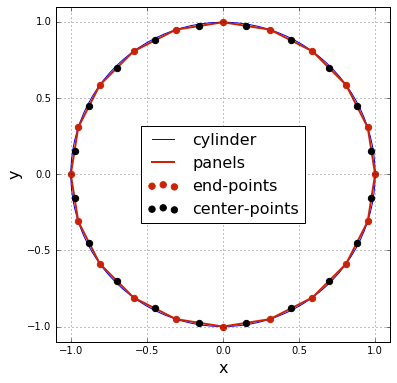

In [5]:
N_panels = 20

x_ends = R*numpy.cos(numpy.linspace(0,2*math.pi,N_panels+1))
y_ends = R*numpy.sin(numpy.linspace(0,2*math.pi,N_panels+1))
panels = numpy.empty(N_panels,dtype = object)
for i in range(N_panels):
    panels[i] = Panel(x_ends[i],y_ends[i],x_ends[i+1],y_ends[i+1])
    
# plot the panels
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder,
            label='cylinder',
            color='b', linestyle='-', linewidth=1)
pyplot.plot(x_ends, y_ends,
            label='panels',
            color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels],
               label='end-points',
               color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels],
               label='center-points',
               color='k', s=40, zorder=3)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

In [6]:
def integral_normal(p_i,p_j):
    
    def integrand(s):
                return ( (+(p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))*math.cos(p_i.beta)
                    +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))*math.sin(p_i.beta))
                    /((p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))**2
                    +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))**2) )
        
    return integrate.quad(integrand,0.0,p_j.length)[0]
        

In [7]:
A = numpy.empty((N_panels,N_panels), dtype=float)
numpy.fill_diagonal(A,0.5)

for i , p_i in enumerate(panels):
    for j , p_j in enumerate(panels):
        if i != j:
            A[i,j] = 0.5/math.pi*integral_normal(p_i,p_j)
            
b = - u_inf * numpy.cos([p.beta for p in panels])

In [8]:
sigma = numpy.linalg.solve(A,b)

for i, panel in enumerate(panels):
    panel.sigma = sigma[i]

In [9]:
def integral_tangential(p_i,p_j):
    
    def integrand(s):
        return ( (-(p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))*math.sin(p_i.beta)
                  +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))*math.cos(p_i.beta))
                /((p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))**2
                  +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))**2) )
    return integrate.quad(integrand,0.0,p_j.length)[0]

In [10]:
A = numpy.empty((N_panels,N_panels),dtype=float)
numpy.fill_diagonal(A,0.0)

for i , p_i in enumerate(panels):
    for j , p_j in enumerate(panels):
        if i != j:
            A[i,j] = 0.5/math.pi*integral_tangential(p_i,p_j)

b = - u_inf * numpy.sin([panel.beta for panel in panels])

vt  = numpy.dot(A,sigma) + b

for i, panel in enumerate(panels):
    panel.vt = vt[i]

In [11]:
for panel in panels:
    panel.cp = 1.0 - (panel.vt/u_inf)**2

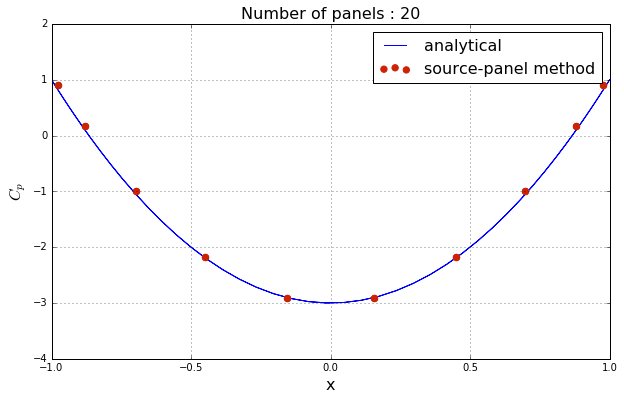

In [12]:

cp_analytical = 1.0 - 4*(y_cylinder/R)**2

# plot the surface pressure coefficient
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot(x_cylinder, cp_analytical,
            label='analytical',
            color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)
pyplot.title('Number of panels : %d' % N_panels, fontsize=16)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-4.0, 2.0);

In [13]:
[p.xc for p in panels]

[0.97552825814757682,
 0.88003675533505055,
 0.69840112333371029,
 0.44840112333371029,
 0.15450849718747375,
 -0.15450849718747364,
 -0.44840112333371018,
 -0.69840112333371018,
 -0.88003675533505044,
 -0.97552825814757682,
 -0.97552825814757682,
 -0.88003675533505055,
 -0.69840112333371041,
 -0.44840112333371041,
 -0.15450849718747386,
 0.15450849718747353,
 0.44840112333371007,
 0.69840112333371018,
 0.88003675533505044,
 0.97552825814757682]

In [34]:
[p.cp for p in panels]

[0.6180339887498959,
 -1.6180339887498945,
 -3.0,
 -1.6180339887498958,
 0.61803398874989424,
 0.61803398874989512,
 -1.6180339887498949,
 -3.0,
 -1.6180339887498949,
 0.61803398874989468]

# Challenge